___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df = df.drop('RowNumber',axis = 1)

In [ ]:
df = df.drop('CustomerId',axis = 1)

In [ ]:
df = df.drop('Surname',axis = 1)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


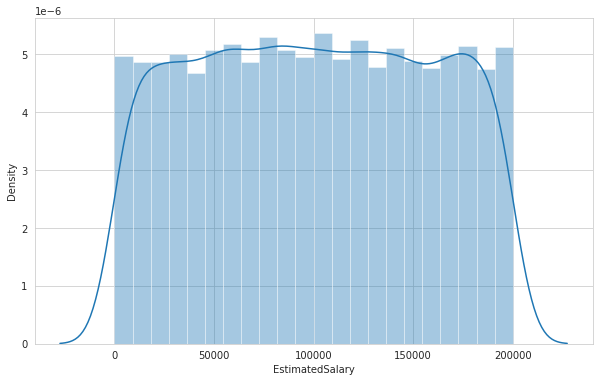

In [ ]:
sns.distplot(df['EstimatedSalary']);

In [ ]:
df = pd.get_dummies(df, drop_first =True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [ ]:
df.shape

(10000, 12)

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)   
print(X_test.shape) 

(8000, 11)
(2000, 11)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)


## Modelling & Model Performance

### Import related libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Creating Model

### without class_weigth

In [ ]:
model = Sequential()
tf.random.set_seed(seed)  

model = Sequential()
model.add(Dense(16, activation = "relu"))  
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) 

model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, epochs=1000, validation_split = 0.1, batch_size=32,verbose=1 )

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5026 - accuracy: 0.7950 - val_loss: 0.4595 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7990 - val_loss: 0.4434 - val_accuracy: 0.8050
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8031 - val_loss: 0.4345 - val_accuracy: 0.8112
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8069 - val_loss: 0.4322 - val_accuracy: 0.8138
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8124 - val_loss: 0.4234 - val_accuracy: 0.8263
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8153 - val_loss: 0.4173 - val_accuracy: 0.8275
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8156 - val_loss: 0.4114 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 18)                216       
                                                                 
 dense_20 (Dense)            (None, 9)                 171       
                                                                 
 dense_21 (Dense)            (None, 1)                 10        
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.503,0.795,0.459,0.810
1,0.467,0.799,0.443,0.805
2,0.454,0.803,0.435,0.811
3,0.443,0.807,0.432,0.814
4,0.437,0.812,0.423,0.826


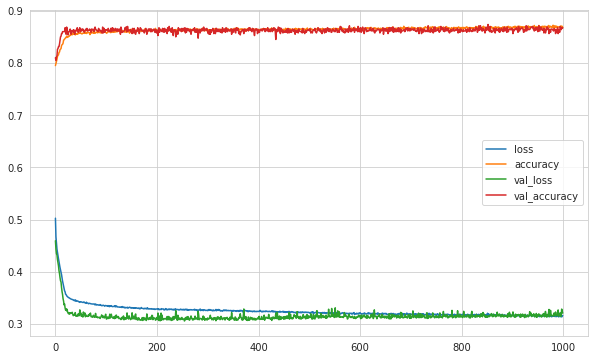

In [ ]:
loss_df.plot();

#### Evaluate

In [ ]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8645


[0.3384183645248413, 0.8644999861717224]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3384183645248413
accuracy :  0.8644999861717224


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)   
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1559   34]
 [ 237  170]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.83      0.42      0.56       407

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
model = Sequential()
tf.random.set_seed(seed)  

model = Sequential()
model.add(Dense(16, activation = "relu"))  
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) 

model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(y_train),
                                                 y = y_train)

In [ ]:
class_weights

array([0.62794349, 2.45398773])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs =1000, verbose=1, 
          class_weight={0 :class_weights[0],
                        1: class_weights[1]})

Epoch 1/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.6788 - accuracy: 0.6695 - val_loss: 0.6467 - val_accuracy: 0.6856
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6703 - val_loss: 0.6557 - val_accuracy: 0.6237
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.6680 - val_loss: 0.5978 - val_accuracy: 0.6888
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6794 - val_loss: 0.5966 - val_accuracy: 0.6888
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.6819 - val_loss: 0.5628 - val_accuracy: 0.7231
Epoch 6/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6933 - val_loss: 0.5614 - val_accuracy: 0.7206
Epoch 7/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7019 - val_loss: 0.5844 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 18)                216       
                                                                 
 dense_20 (Dense)            (None, 9)                 171       
                                                                 
 dense_21 (Dense)            (None, 1)                 10        
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.425,0.803,0.446,0.796
1,0.423,0.808,0.428,0.808
2,0.425,0.808,0.438,0.797
3,0.424,0.807,0.449,0.789
4,0.425,0.806,0.414,0.813


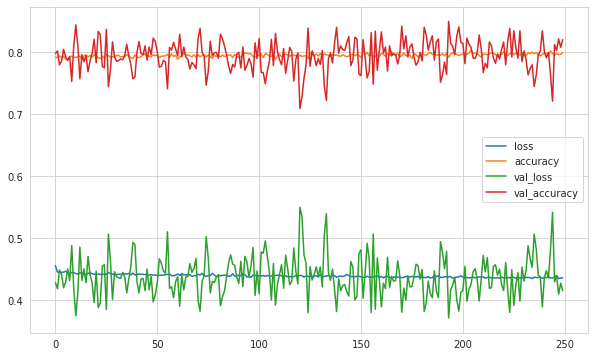

In [ ]:
loss_df.plot();

#### Evaluate

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4254653751850128, 0.7940000295639038]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4254653751850128
accuracy :  0.7940000295639038


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1287  306]
 [ 106  301]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.79      0.81      2000



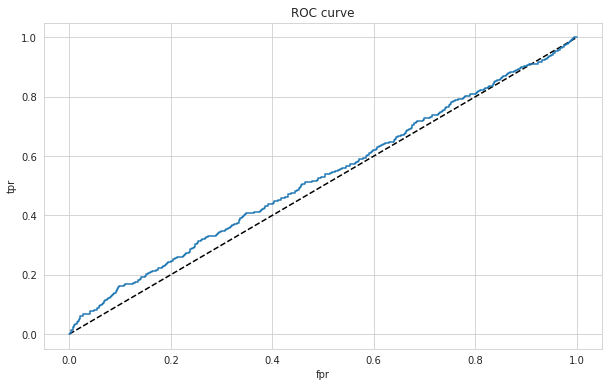

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.5277002734629853

## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units =16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 20)

In [208]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
INFO:tensorflow:Assets written to: ram://892cbde2-5f63-4a51-925a-6491a9a43137/assets
INFO:tensorflow:Assets written to: ram://370d00d5-c46e-4ff4-9473-31ca9f19d7d8/assets
INFO:tensorflow:Assets written to: ram://e3f5290d-b80c-4b21-a70f-ac23478f0257/assets


KeyboardInterrupt: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by='rank_test_score')
grid_result

In [ ]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Evaluate

## Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3288 - accuracy: 0.8600 - val_loss: 0.3348 - val_accuracy: 0.8685
Epoch 2/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3248 - accuracy: 0.8639 - val_loss: 0.3361 - val_accuracy: 0.8680
Epoch 3/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3226 - accuracy: 0.8637 - val_loss: 0.3363 - val_accuracy: 0.8715
Epoch 4/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.3240 - accuracy: 0.8640 - val_loss: 0.3372 - val_accuracy: 0.8670
Epoch 5/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8615 - val_loss: 0.3355 - val_accuracy: 0.8665
Epoch 6/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8609 - val_loss: 0.3384 - val_accuracy: 0.8695
Epoch 7/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8627 - val_loss: 0.3360 - val_accuracy:

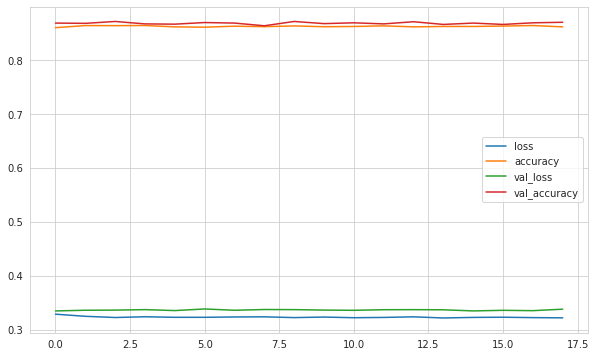

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33803585171699524
accuracy :  0.8700000047683716


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1520   73]
 [ 187  220]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1593
           1       0.75      0.54      0.63       407

    accuracy                           0.87      2000
   macro avg       0.82      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
model.save('model_churn.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

### Prediction

In [ ]:
single_churn = df.drop('Exited', axis = 1).iloc[10:15, :]
single_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
10,528,31,6,102016.720,2,0,0,80181.120,0,0,1
11,497,24,3,0.000,2,1,0,76390.010,0,1,1
12,476,34,10,0.000,2,1,0,26260.980,0,0,0
13,549,25,5,0.000,2,0,0,190857.790,0,0,0
14,635,35,7,0.000,2,1,1,65951.650,0,1,0


In [ ]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.356     , 0.17567568, 0.6       , 0.42794481, 0.33333333,
        0.        , 0.        , 0.40088598, 0.        , 0.        ,
        1.        ],
       [0.294     , 0.08108108, 0.3       , 0.        , 0.33333333,
        1.        , 0.        , 0.38192862, 0.        , 1.        ,
        1.        ],
       [0.252     , 0.21621622, 1.        , 0.        , 0.33333333,
        1.        , 0.        , 0.13125954, 0.        , 0.        ,
        0.        ],
       [0.398     , 0.09459459, 0.5       , 0.        , 0.33333333,
        0.        , 0.        , 0.95432219, 0.        , 0.        ,
        0.        ],
       [0.57      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 1.        , 0.32973184, 0.        , 1.        ,
        0.        ]])

In [ ]:
prediction = (pd.DataFrame(model_churn.predict(single_churn) > 0.5, columns=["prediction"]).astype("int32"))
prediction

,prediction
0,0
1,0
2,0
3,0
4,0


In [ ]:
actual = pd.DataFrame(df.sample(n=5, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("int32")
actual

,actual
6676,0
6421,0
9834,1
8492,0
9982,1


In [ ]:
pred_df = actual.join(prediction.set_index(actual.index))
pred_df

,actual,prediction
6676,0,0
6421,0,0
9834,1,0
8492,0,0
9982,1,0


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___